In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
df=pd.read_csv("Train.csv")
df.head()

feature_1  feature_2  feature_3  feature_4  feature_5     target
0   0.293416  -0.945599  -0.421105   0.406816   0.525662 -82.154667
1  -0.836084  -0.189228  -0.776403  -1.053831   0.597997 -48.897960
2   0.236425   0.132836  -0.147723   0.699854  -0.187364  77.270371
3   0.175312   0.143194  -0.581111  -0.122107  -1.292168  -2.988581
4  -1.693011   0.542712  -2.798729  -0.686723   1.244077 -37.596722

In [126]:
dftest=pd.read_csv("Test.csv")

In [127]:
x=[]
x.append(df['feature_1'].values)
x.append(df['feature_2'].values)
x.append(df['feature_3'].values)
x.append(df['feature_4'].values)
x.append(df['feature_5'].values)

In [129]:
x_test=[]
x_test.append(dftest['feature_1'].values)
x_test.append(dftest['feature_2'].values)
x_test.append(dftest['feature_3'].values)
x_test.append(dftest['feature_4'].values)
x_test.append(dftest['feature_5'].values)

In [132]:
y=df['target'].values

In [133]:
xtrain=pd.DataFrame(np.matrix.transpose(np.array(x)))
xtrain['y']=y
xtrain.head()

0         1         2         3         4          y
0  0.293416 -0.945599 -0.421105  0.406816  0.525662 -82.154667
1 -0.836084 -0.189228 -0.776403 -1.053831  0.597997 -48.897960
2  0.236425  0.132836 -0.147723  0.699854 -0.187364  77.270371
3  0.175312  0.143194 -0.581111 -0.122107 -1.292168  -2.988581
4 -1.693011  0.542712 -2.798729 -0.686723  1.244077 -37.596722

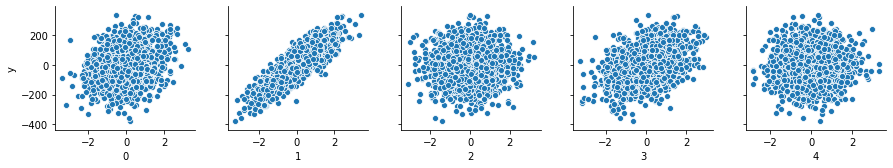

In [134]:
sns.pairplot(xtrain,x_vars=[0,1,2,3,4],y_vars=['y'])

In [135]:
def hypothesis(x,i,theta):
    hx=theta[0]
    for j in range(0,5):
        hx+=theta[j+1]*x[j][i]
    return hx

In [136]:
def error(x,y,theta):
    err=0
    for i in range(0,x[0].shape[0]):
        err+=(y[i]-hypothesis(x,i,theta))**2
    return err

In [137]:
def gradient(x,y,theta):
    grad=np.zeros((6,))
    for i in range(0,x[0].shape[0]):
        hx=hypothesis(x,i,theta)
        grad[0]+=hx-y[i]
        for j in range(0,5):
            grad[j+1]=(hx-y[i])*x[j][i]
    return grad

In [138]:
def gradientDescent(x,y,learningRate=0.0001):
    theta=np.array([-400.0,0.0,0.0,0.0,0.0,0.0])
    itr=400
    errorList=[]
    thetaList=[]
    for i in range(0,itr):
        err=error(x,y,theta)
        errorList.append(err)
        thetaList.append(theta)
        grad=gradient(x,y,theta)
        for j in range(0,5):
            theta[j]-=learningRate*grad[j]
    return theta,errorList,thetaList

In [139]:
opt_theta,errorList,thetaList=gradientDescent(x,y)

In [140]:
opt_theta

array([ 0.54754803,  7.34402473,  3.31115457,  5.66109763, -1.9046635 ,
        0.        ])

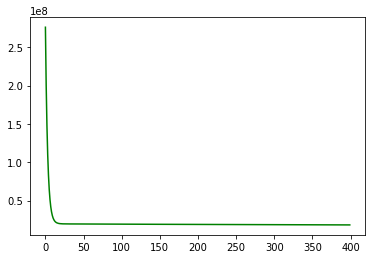

In [141]:
plt.plot(errorList,color='green')
plt.show()

In [142]:
hx=np.zeros((x_test[0].shape[0],))
for i in range(0,x_test[0].shape[0]):
    hx[i]+=hypothesis(x_test,i,opt_theta)   

In [143]:
print(hx)

[ 1.79755788e+01  3.15578665e+00 -2.55174139e+00 -1.13742511e+01
  3.69675135e+00  1.44930828e+01 -1.00239852e+01 -7.78878535e+00
  5.26295187e+00  1.08682436e+01 -4.14814529e+00 -6.40620486e+00
 -2.86716237e+00  1.71360481e+01  1.38935817e+01 -4.33166358e+00
  1.39856528e+01  1.37690023e+01 -8.48206987e+00  2.20486426e+01
 -1.85978916e+00 -1.85501566e+00 -6.30909645e+00  1.24509297e+01
 -1.76575211e+01 -6.50586383e+00  1.27609687e+01 -4.39969125e+00
  1.54473679e+01 -5.74841148e+00  6.72704989e+00 -8.82015969e-01
  3.24126689e+00  1.76067147e+01 -7.69118688e+00  1.00910182e+01
  2.28551870e+01 -2.41280623e+00 -2.45998795e+01  7.30729824e+00
  3.47360858e+00 -1.11730556e+01 -1.00425341e+01  7.02654055e+00
 -1.59787553e+01  3.14774848e+01  7.06459743e-01  4.57625181e+00
  1.25545017e+00  3.77191565e+00 -7.39053486e+00 -8.60295642e-02
  7.10189066e+00  7.86485616e+00 -8.81552542e+00  2.27953790e+00
 -7.52797709e+00  7.45714469e+00 -5.27246884e+00 -1.43735809e+01
  7.04468111e+00  4.65611